# Explore here

It's recommended to use this notebook for exploration purposes.

In [9]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

url = "https://ycharts.com/companies/TSLA/revenues"
html_data = requests.get(url, time.sleep(10)).text

if "403 ERROR" in html_data:
    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
    html_data = requests.get(url, headers = headers)
    time.sleep(10)
    html_data = html_data.text

html_data

'\n\n\n\n\n\n\n<!doctype html>\n<html lang="en" ng-jq>\n    <head>\n        <title>\n        Tesla Revenue (Quarterly) Analysis | YCharts\n        </title>\n\n        <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n<!-- This code allows us to correctly display the page on mobile devices -->\n<script defer>\n    var viewport = document.querySelector(\'meta[name=viewport]\');\n    if (viewport) {\n        var minWidth = 700;\n        if (screen.width < minWidth) {\n            document.head.removeChild(viewport);\n            var newViewport = document.createElement(\'meta\');\n            newViewport.setAttribute(\'name\', \'viewport\');\n            newViewport.setAttribute(\'content\', \'width=\' + minWidth);\n            document.head.appendChild(newViewport);\n        }\n    }\n</script>\n\n\n        \n        <script>\n    if (navigator.userAgent.indexOf(\'Trident\') !== -1 || navigator.userAgent.indexOf(\'MSIE\') !== -1) {\n        window.onload=function(

In [21]:
soup = BeautifulSoup(html_data,"html.parser")
soup

tables = soup.find_all("table")
tables

for index, table in enumerate(tables):
    if ("Date" in str(table)):
        table_index = index
        break

tesla_df = pd.DataFrame(columns = ["Date", "Revenue"])
for row in tables[table_index].find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text
        revenue = float(col[1].text.strip().replace('B', ''))
        tesla_df = pd.concat([tesla_df, pd.DataFrame({"Date": date,"Revenue": revenue}, index = [0])], ignore_index = True)

tesla_df

,Date,Revenue
0,"December 31, 2023",25.17
1,"September 30, 2023",23.35
2,"June 30, 2023",24.93
3,"March 31, 2023",23.33
4,"December 31, 2022",24.32
5,"September 30, 2022",21.45
6,"June 30, 2022",16.93
7,"March 31, 2022",18.76
8,"December 31, 2021",17.72
9,"September 30, 2021",13.76


In [23]:
conn = sqlite3.connect('tesla_db')
c = conn.cursor()
'''
c.execute('CREATE TABLE tesla_revenue (date TEXT, revenue REAL)')
conn.commit()
'''
tesla_df.to_sql('tesla_revenue', conn, if_exists='replace', index= False)



25

In [24]:
c.execute('SELECT * FROM tesla_revenue').fetchall()

[('December 31, 2023', 25.17),
 ('September 30, 2023', 23.35),
 ('June 30, 2023', 24.93),
 ('March 31, 2023', 23.33),
 ('December 31, 2022', 24.32),
 ('September 30, 2022', 21.45),
 ('June 30, 2022', 16.93),
 ('March 31, 2022', 18.76),
 ('December 31, 2021', 17.72),
 ('September 30, 2021', 13.76),
 ('June 30, 2021', 11.96),
 ('March 31, 2021', 10.39),
 ('December 31, 2020', 10.74),
 ('September 30, 2020', 8.771),
 ('June 30, 2020', 6.036),
 ('March 31, 2020', 5.985),
 ('December 31, 2019', 7.384),
 ('September 30, 2019', 6.303),
 ('June 30, 2019', 6.35),
 ('March 31, 2019', 4.541),
 ('December 31, 2018', 7.226),
 ('September 30, 2018', 6.824),
 ('June 30, 2018', 4.002),
 ('March 31, 2018', 3.409),
 ('December 31, 2017', 3.288)]

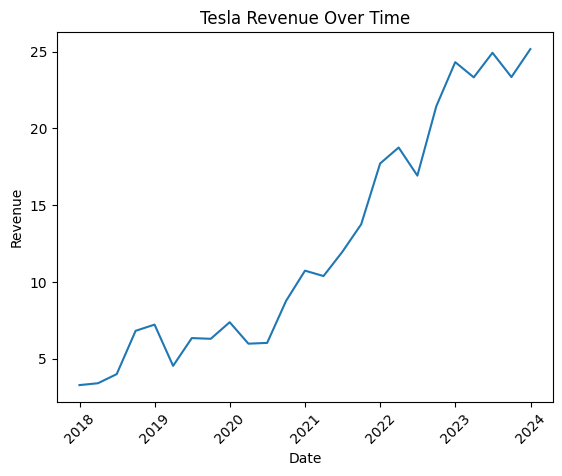

In [28]:
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])
sns.lineplot(x='Date', y='Revenue', data=tesla_df)
plt.title('Tesla Revenue Over Time')
plt.tight_layout
plt.xticks(rotation=45)
plt.show()

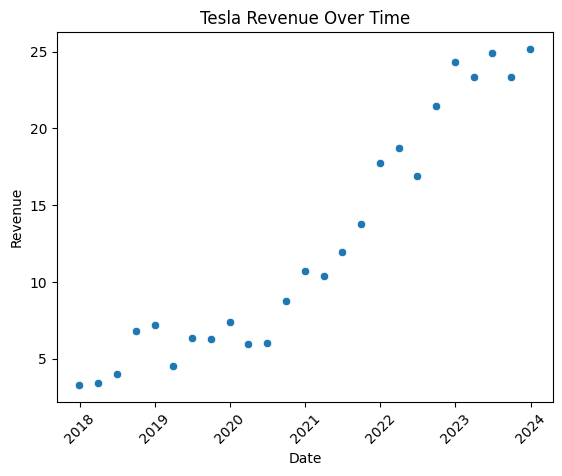

In [29]:
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])
sns.scatterplot(x='Date', y='Revenue', data=tesla_df)
plt.title('Tesla Revenue Over Time')
plt.tight_layout
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_1764/4155257418.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  tesla_revenue_anual = tesla_df.groupby(tesla_df['Date'].dt.year).sum()


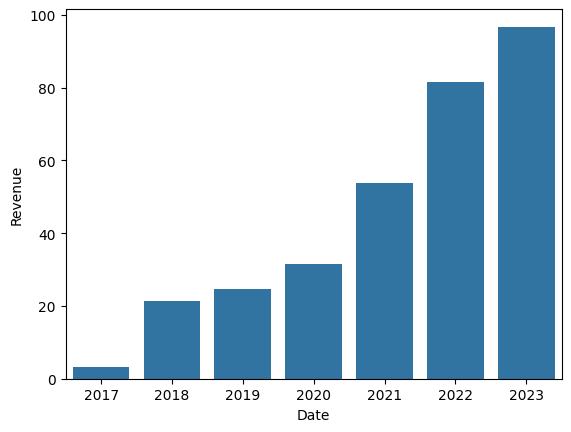

In [30]:
tesla_revenue_anual = tesla_df.groupby(tesla_df['Date'].dt.year).sum()
sns.barplot(x=tesla_revenue_anual.index, y=tesla_revenue_anual['Revenue'])
plt.show()